<a href="https://colab.research.google.com/github/dton24/PortfolioProjects/blob/main/Adidas_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 4321 Project: Multiple Linear Regression - Adidas
by Dylan Ton

## 1. Problem definition
Start with explaining the problem and how you plan the address it using machine learning.

The crux of the issue lies in Adidas's struggle to maintain its foothold against the overpowering presence of Nike in recent years across various segments. The overarching goal of this project is to develop a predictive model, specifically a Multiple Linear Regression (MLR) model, that can accurately forecast which stores are likely to exhibit lower operating margins based on a set of specific features. By understanding these characteristics, the model will help inform decisions to avoid replicating these features in new store developments, thus safeguarding against practices that could detrimentally impact profitability.

Additionally, the model will serve as a tool to identify existing stores with low operating margins, providing a basis for targeted strategies to enhance their financial performance. The insights gained will also lay the groundwork for further research into the causal relationships between store features and their operating margins. Ultimately, this model aims to guide cost-efficiency improvements and margin optimization across store operations.

## 2. Data description
Explain the source of data, what each record represents, number of records, and detailed descriptions of all variables including at least a one-sentence description and data type. Specify which variables will be used in analysis.

**Disclaimer:**
We are assuming this dataset is representative of the entire population.

**Source of Dataset**
- Our source of the dataset is a public dataset website called Kaggle.
- Usability score: 8.24/10
- Heemali Chaudhari. (2023, January). Adidas Sales Dataset, Version 1. Retrieved
October 17, 2023 from https://www.kaggle.com/datasets/
heemalichaudhari/adidas-sales-dataset.
- Link: https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset

**Explain what each record represents**
- Each record represents the cumulative daily sales of a specific type of product at a particular
retailer. Each record is comprised of 13 different attributes, including Retailer, Retailer ID,
Invoice Date, Region, State, City, Product, Price per Unit, Units Sold, Total Sales, Operating
Profit, Operating Profit, and Sales Method. Each record provides information on different
metrics such as location, finances, and time.

- Number of records: 9648 records (or rows)
- Numeric columns: Range of values, mean, and standard deviation
- Categorical columns: All distinct values and their frequencies

**Detailed descriptions of all variables including at least a one-sentence description, data
type, and descriptive statistics.**
1. Retailer: This indicates the name of the store or company that sold Adidas products.
- Data type: String
- Contains 6 distinct categorical variables: Amazon, Foot Locker, Kohl’s, Sports Direct,
Walmart, West Gear
- 4 NULL values

2. Retailer ID: A unique identifier or code associated with each retailer ?
- Data type: Integer
- This is an identifier. It is not a numeric column. It is technically a categorical
column because each identifier can be considered as a category.
- There are problems with this column, as you can see from the chart below.
Retailer ID is associated with multiple retailers, vice versa. Moreover, there are
only 4 distinct Retailer IDs, however, there are 6 different retailers.
- Due to these errors, we will get rid of this column.

3. Invoice Date: The date on which the sale was made or the transaction occurred
(month-day-year).
- Data type: Date (month-day-year)
- Contains 724 distinct categorical variables: There is a category for each specific
date, thus, there are is a large amount of categorical variables

4. Region: The broader geographical area where the sale took place.
- Data type: String
- Contains 5 distinct categorical variables: Midwest, Northeast, South, Southeast,
West

5. State: The specific state within the country where the retailer is located and the sale
occurred.
- Data type: String
- Contains 50 distinct categorical variables: Categorized by 50 different U.S states

6. City: The city where the retailer's store is situated and where the sale was made.
- Data type: String
- Contains 52 distinct categorical variables: Categorized by 52 different U.S cities


7. Product: The category of the product that was sold.
- Data type: String
- Contains 6 distinct categorical variables: Men’s Apparel, Men’s Athletic Footwear,
Men’s Street Footwear, Women’s Apparel, Women’s Athletic Footwear, Women’s
Street Footwear

8. Price per Unit: The selling price of a single unit of the product.
- Data Type: Float

9. Units Sold: The total number of units of the product that were sold.
- Data Type: INT

10. Total Sales: The total monetary value of the sales, calculated as the product of "Price
per Unit" and "Units Sold".
- Data Type: Float

11. Operating Profit: The profit made from the sale after deducting the basic costs
associated with selling that product, but before considering other expenses like interest
and taxes.
- Data Type: Float
- Every 1 = $1

12. Operating Margin: This is a percentage that indicates how much profit was made from
the total sales. It's calculated as the ratio of "Operating Profit" to "Total Sales". A higher
percentage indicates greater profitability.
- Data Type: Float

13. Sales Method: Describes the method or channel through which the sale was made. For
instance, "In-store" indicates that the product was bought directly from a physical retail
location.
- Data Type: String
- Contains 3 distinct categorical variables: In-store, Online, Outlet

**Attributes to remove**
- Make a new column called ‘Invoice Month’ extracting the month from ‘Invoice Date’
- Remove ‘Invoice Date” column because it is too specific and may lead to overfitting
- Delete the ‘Retailer ID’ column because it is too specific to a specific store and will lead
to overfitting
- Delete  ‘Units Sold’, ‘Operating Margin’, and ‘Total Sales’ because
‘Operating Profit’ is dependent on these attributes. Keeping it will lead to multicollinearity.
- Remove 'State' and 'City' to precent overfitting because these locations are too specific.

**Attributes Planned to Use for Model**
- **Retailer**: Effects of the type of retailer on operating profit
      

- **Region**: Effects of where the products are sold on operating profit

- **Product**: Effect of what type of products are sold on operating profit

- **Operating Margin** (Dependent Variable): Outcome

- **Sales Method**: Effect of selling method on operating profit

- **Price Per Unit** -> **Price Per Unit Level**: Effect on how much the average customer spends on an item at each store on operating profit



## 3. Method of analysis
Explain the selected method (classification, regression, or clustering).

The overarching goal of this project is to develop a predictive model, specifically a Multiple Linear Regression (MLR) model, that can accurately forecast which stores are likely to exhibit lower operating margins based on a set of specific features. By understanding these characteristics, the model will help inform decisions to avoid replicating these features in new store developments, thus safeguarding against practices that could detrimentally impact profitability.

**Attributes Planned to Use for Model**
- **Retailer**: Effects of the type of retailer on operating profit
      

- **Region**: Effects of where the products are sold on operating profit

- **Product**: Effect of what type of products are sold on operating profit

- **Operating Margin** (Dependent Variable): Outcome

- **Sales Method**: Effect of selling method on operating profit

- **Price Per Unit** -> **Price Per Unit Level**: Effect on how much the average customer spends on an item at each store on operating profit

## 4. Loading packages and data

Import and load packages

In [ ]:
%matplotlib inline
!pip install dmba

In [ ]:
from pathlib import Path

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

Load your dataset using a relative path.

In [ ]:
import pandas as pd
df = pd.read_excel("Adidas US Sales Datasets.xlsx", sheet_name = 'Data Sales Adidas')
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


# Correlation Matrix & Analysis: Is multicollinearity an issue?
**Below, is a correlation matrix I used to help determine which numerical variables to drop due to multicollinearity. **

<ipython-input-270-b906c47e675d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


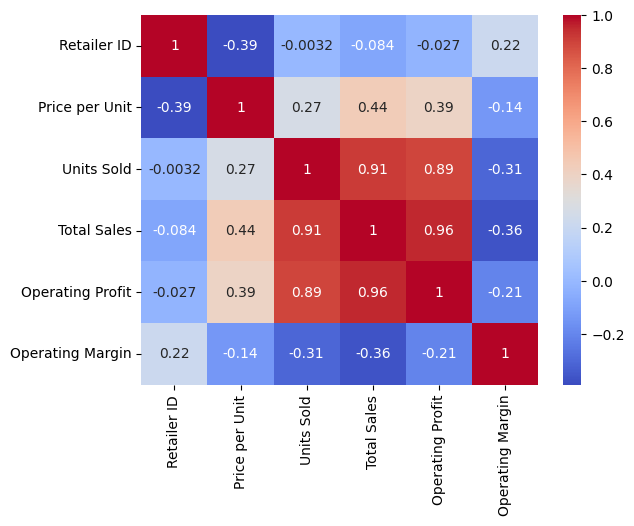

In [ ]:

# Assuming you have a DataFrame 'df' with numerical columns
correlation_matrix = df.corr()

# This will give you a DataFrame with the correlation values

import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn to create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


Upon examining 'Operating Margin' in relation to other variables, we observe no substantial correlations, suggesting a potential absence of multicollinearity among the independent variables and the dependent variable. Despite this, I have opted to exclude most of these variables to err on the side of caution, given their theoretical interdependence, as previously discussed. However, 'Price per Unit' will be retained since it theoretically does not directly influence operating margin, and this is supported by the data showing a very weak negative correlation of -0.14 with operating margin.

## 5. Data Cleaning

Remove ‘Invoice Date” column because it is too specific and may lead to overfitting

In [ ]:
df = df.drop(columns = 'Invoice Date')

Delete the ‘Retailer ID’ column because it is too specific to a specific store and will lead to overfitting

In [ ]:
df = df.drop(columns = 'Retailer ID')

Delete ‘Price per Unit’, ‘Units Sold’, ‘Operating Margin’, and ‘Total Sales’ because ‘Operating Profit’ is dependent on these attributes. Keeping it will lead to multicollinearity.

In [ ]:
df = df.drop(columns = ['Units Sold', 'Operating Profit' , 'Total Sales'])

Remove 'State' and 'City' to precent overfitting because these locations are too specific.

In [ ]:
df = df.drop(columns = ['City', 'State'])

Change name of 'Product' column to 'Product Type' for clearer understanding of column.

In [ ]:
df = df.rename(columns={'Product': 'Product Type'})

Turn 'Price Per Unit' into a categorical column by binning into categories. This is because we want to avoid overfitting the model with these specific numbers.
*   7-20: "Extremely Low" - Stores where shoppers typically buy the most affordably priced items.
*   21-40: "Low" - Stores with a customer base that buys regularly priced Adidas merchandise.
*   41-60: "Moderate" - Stores where shoppers often purchase slightly higher-priced, quality Adidas products.
*   61-80: "High" - Stores attracting customers who buy premium, higher-cost items.
*   81-150: "Very High" - Stores frequented by shoppers purchasing the most expensive, luxury Adidas products.




In [ ]:
#Find min and max values for Price per Unit
df['Price per Unit'].describe()

count    9648.000000
mean       45.216625
std        14.705397
min         7.000000
25%        35.000000
50%        45.000000
75%        55.000000
max       110.000000
Name: Price per Unit, dtype: float64

In [ ]:
# Define the bins and their corresponding labels
bins = [6, 20, 40, 60, 80, 111]
labels = ['Extremely Low', 'Low', 'Moderate', 'High', 'Very High']

# Bin 'Price per Unit' into categories and assign the labels
df['Price per Unit Level'] = pd.cut(df['Price per Unit'], bins=bins, labels=labels, include_lowest=True)

# The DataFrame 'df' now has an additional column 'Price per Unit Level', which indicates which stores' customers pay the most for Adidas Products.



Delete 'Price per Unit' column

In [ ]:
df = df.drop(columns = 'Price per Unit')

Examine new columns

In [ ]:
df.head()

,Retailer,Region,Product Type,Operating Margin,Sales Method,Price per Unit Level
0,Foot Locker,Northeast,Men's Street Footwear,0.50,In-store,Moderate
1,Foot Locker,Northeast,Men's Athletic Footwear,0.30,In-store,Moderate
2,Foot Locker,Northeast,Women's Street Footwear,0.35,In-store,Low
3,Foot Locker,Northeast,Women's Athletic Footwear,0.35,In-store,Moderate
4,Foot Locker,Northeast,Men's Apparel,0.30,In-store,Moderate


## 6. Descriptive statistics
Run descriptive statistics. Explain how the output will guide your analysis.

In [ ]:
# .describe() shows the descriptive statistic of numerical variables
df.describe()

,Operating Margin
count,9648.000000
mean,0.422991
std,0.097197
min,0.100000
25%,0.350000
50%,0.410000
75%,0.490000
max,0.800000


- There are 9,648 observations.
- The average operating margin across all observations is approximately 0.42 dollars.
- The standard deviation, which measures the spread of the operating margins, is about 0.10 dollars, indicating some variability in the data.
- The smallest operating margin in the dataset is 0.10 dollars.
- The first quartile (25%) of the data is at 0.35 dollars, meaning 25% of the observations have operating margins less than or equal to this value.
- The median (50%) is 0.41 dollars, indicating that half the companies have operating margins less than this, and half have margins higher.
- The third quartile (75%) is at 0.49 dollars, so 75% of the observations are below this value.
- The highest operating margin recorded in the data is 0.80 dollars.


The descriptive statistics for "Operating Profit" provide a foundational understanding of the dataset's characteristics, which is essential when preparing for multiple linear regression (MLR) analysis. The mean presents a central value around which the data points aggregate, offering a sense of the average behavior within the dataset. The standard deviation expands on this by quantifying the dispersion of the data, indicating the degree to which each data point deviates from the average. A larger standard deviation signals a wider spread of data, which could affect the stability of the regression coefficients.

The range, demonstrated by the minimum and maximum values, defines the extent of the data, crucial for identifying the bounds of our variables. This is particularly important in MLR, as extreme values can disproportionately influence the model.

The quartiles, including the 25th, 50th (median), and 75th percentiles, provide a deeper dive into the data distribution. They help to detect any skewness—where the distribution may lean towards higher or lower values—and to identify potential outliers. In MLR, outliers can leverage and distort the relationship between the independent variables and the dependent variable, which might result in a less accurate model.

These statistics will directly inform the preprocessing steps I take before running the MLR, such as normalizing the data, handling outliers, or potentially transforming variables to better meet the assumptions of linear regression. A thorough understanding of the dataset's distribution will also guide the interpretation of the MLR results, helping to discern the relationships between variables and the predicted outcomes. Morever, the mean will help me with the regression summary to see if the model is performing well and if the difference in actual vs. predicted value is substantial.

## 7. Missing values and outliers
Explain the steps that you plan to take to handle missing values and any potential outliers. Run code that handles missing values and outliers.

In [ ]:
# .isna() method shows the NULL values in your dataframe, and the .sum() function shows the total amount of NULL values under each column.
df.isna().sum()

Retailer                0
Region                  0
Product Type            0
Operating Margin        0
Sales Method            0
Price per Unit Level    0
dtype: int64

As we can see from above, I calculated the total amount of missing values in each column. There are no missing values in each of these columns, thus, there will be no need to removie any rows.

**Outliers**
----------

**Operating Profit**

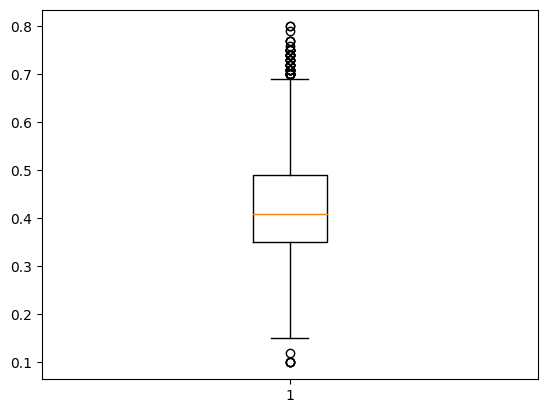

In [ ]:
# Original box plot showing the outliers
plt.boxplot(df['Operating Margin'], notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the 'Operating Profit'
q1 = df['Operating Margin'].quantile(0.25)
q3 = df['Operating Margin'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Identify the outliers
outliers = (df['Operating Margin'] < q1 - 1.5 * iqr) | (df['Operating Margin'] > q3 + 1.5 * iqr)

# Filter out the outliers to get a new DataFrame without outliers
df= df[~outliers]

# Now df_no_outliers contains the data without the outliers
print('There are ' + str(9648-df['Retailer'].count()) + ' outliers according to the formula. We have gotten rid of them.')

There are 63 outliers according to the formula. We have gotten rid of them.


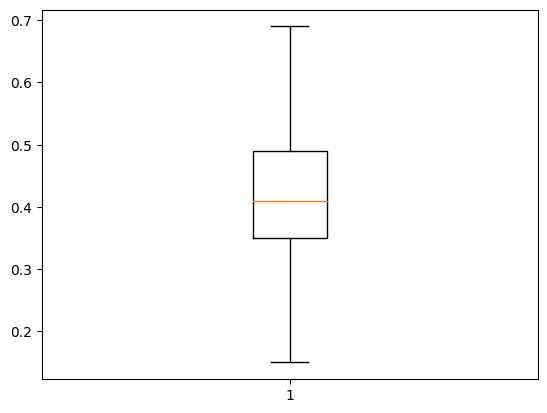

In [ ]:
#Display new box plot, with the outliers gone
plt.boxplot(df['Operating Margin'], notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

**Conclusion**: After calculating the outliers using the basic outlier formula, I can clearly see that there are a large number (706) of 'outliers'. Within these outliers, we can see that there are not records that are far off from the rest of the data values. I will keep all of the records and do not deem there to be any outliers to rid of.

## 8. Data visualization

**Check the distribution of all numeric variables using histograms. Use Python. Interpret
the distribution of each variable**

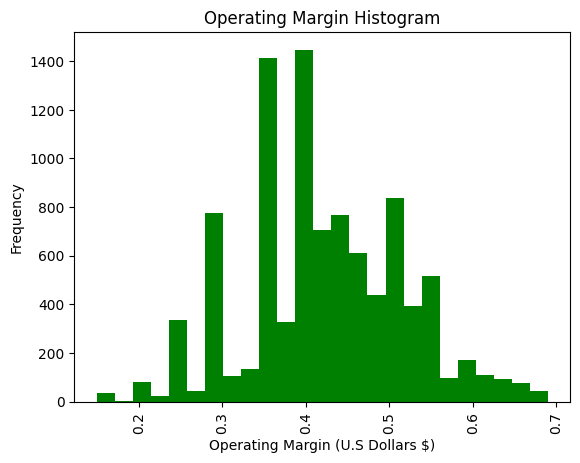

As you can see from this histogram, most Adidas stores have an operating margin between 35 and 55%.


In [ ]:
# Histogram for 'Operating Profit'
plt.hist(df['Operating Margin'], bins = 25, color = 'green')
plt.xlabel('Operating Margin (U.S Dollars $)')
plt.ylabel('Frequency')
plt.title('Operating Margin Histogram')
plt.xticks(rotation=90)
plt.show()
print('As you can see from this histogram, most Adidas stores have an operating margin between 35 and 55%.')

The histogram is extremely skewed to the right. A majority of the records have an operating margin 0.35 (35% profit) and 0.55 (55% profit). The mean, 0.42 (42% profit), lies within this range. Overall the histogram displays an imperfect bell curve, which the bin having the higest frequency being slightly less than the mean. Moreover, there are random spikes on the both sides of the histogram (specifically the left).

**Check the frequency of all categorical variables using bar charts and interpret the
outcome.**

*Retailer*

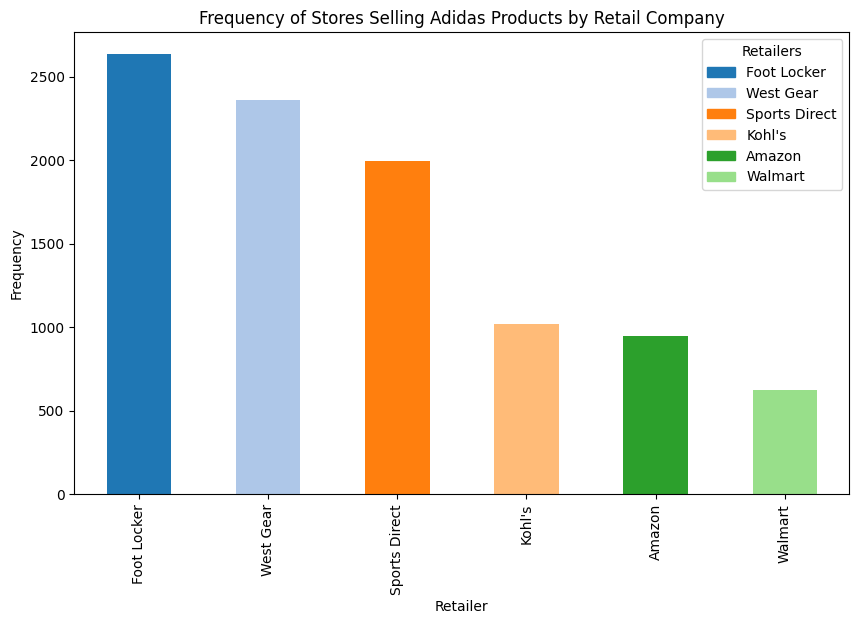

In [ ]:
import matplotlib.patches as mpatches
import numpy as np

# Set the figure size
plt.figure(figsize=(10, 6))  # Width = 10 inches, Height = 6 inches

# Assuming df['Retailer'].value_counts() is your data
retailer_frequency = df['Retailer'].value_counts()

#Define colors using tab colormap
colors = plt.cm.tab20(np.linspace(0, 1, 20))

# Plot the bar chart
retailer_frequency.plot(kind='bar', xlabel='Retailer', ylabel='Frequency',
                        title='Frequency of Stores Selling Adidas Products by Retail Company',
                        color=colors)

# Create a list of patches for the legend
retailer_patches = [mpatches.Patch(color=color, label=retailer) for color, retailer in zip(colors, retailer_frequency.index)]

# Adding the legend
plt.legend(handles=retailer_patches, title='Retailers')

# Show the plot
plt.show()


The bar chart reveals which retailers are the most instrumental in distributing Adidas products, highlighting Foot Locker at the forefront with approximately 2,600 stores, followed by West Gear with 2,400, and Sports Direct with 2,000. There is a significant drop after the top three, with Kohl's featuring around 1,000, Amazon with nearly 950, and Walmart with 600 stores.

*Region*

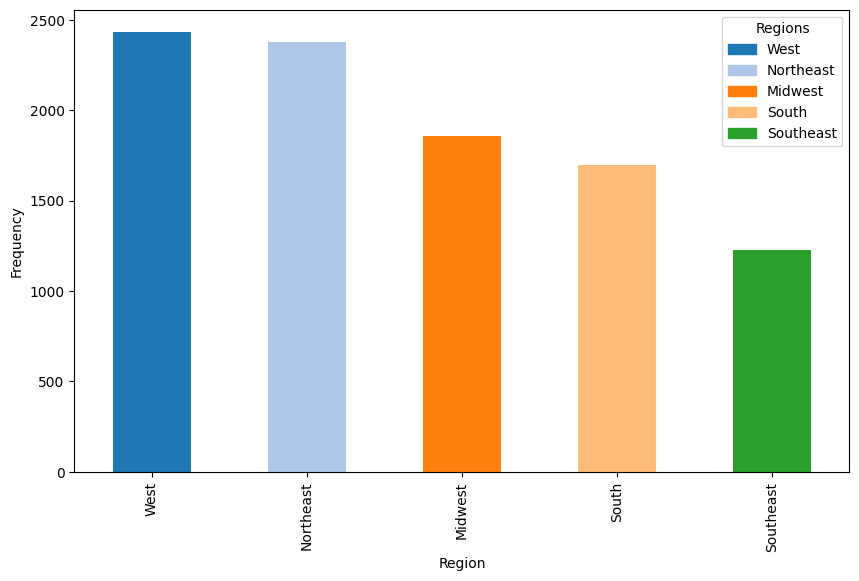

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Width = 10 inches, Height = 6 inches

# Assuming 'df' is your DataFrame and you have a 'Region' column in it
region_frequency = df['Region'].value_counts()

# Plot the bar chart
region_frequency.plot(kind='bar', xlabel='Region', ylabel='Frequency', color=colors)

# Create a list of patches for the legend
region_patches = [mpatches.Patch(color=color, label=region) for color, region in zip(colors, region_frequency.index)]

# Adding the legend with a title 'Regions'
plt.legend(handles=region_patches, title='Regions')

# Show the plot
plt.show()

The bar chart showcases the distribution of stores selling Adidas products across different regions. It highlights that the West leads with approximately 2,450 stores, closely followed by the Midwest with around 2,400. The Northeast comes next with a significant decrease at about 1,850 stores, trailed by the South with a slight decrease to roughly 1,800, and finally, the Southwest has the fewest at approximately 1,200 stores. As we can see from this, Adidas stores are more common in the West and Northeastern regions of the United States, followed by the Midwest and South. There are not as many locations in the Southeast.

*Product Type*

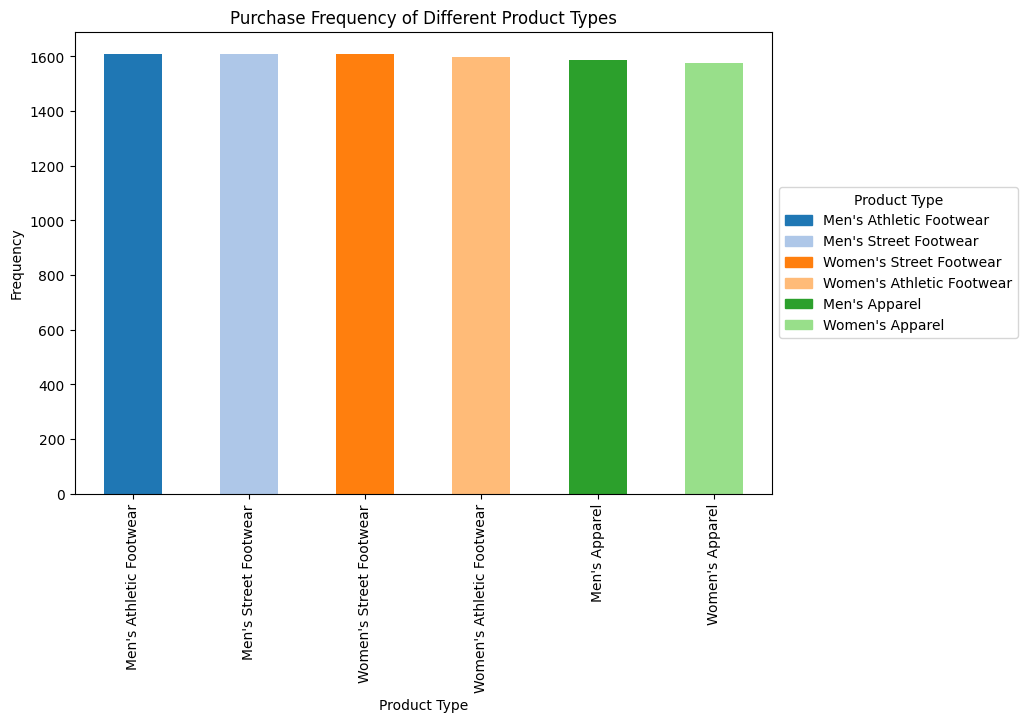

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and 'Product Type' is the column of interest
product_frequency = df['Product Type'].value_counts()

# Define the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart and get the current axes
ax = product_frequency.plot(kind='bar', xlabel='Product Type', ylabel='Frequency', title='Purchase Frequency of Different Product Types', color=colors)

# Get the position of the current axes
pos = ax.get_position()

# Set the new position to make space for the legend
# Here we're taking 90% of the width and the full height
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])

# Create patches for the legend
product_patches = [mpatches.Patch(color=color, label=product) for color, product in zip(colors, product_frequency.index)]

# Place the legend outside the plot area on the right side, centered vertically
ax.legend(handles=product_patches, title='Product Type', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


As we can see from the chart above, all of the types of products get bought about the same amount. We can assume that choosing to sell more of one type of product over another is not going to be effective because they are equally as important.

*Sales Method*

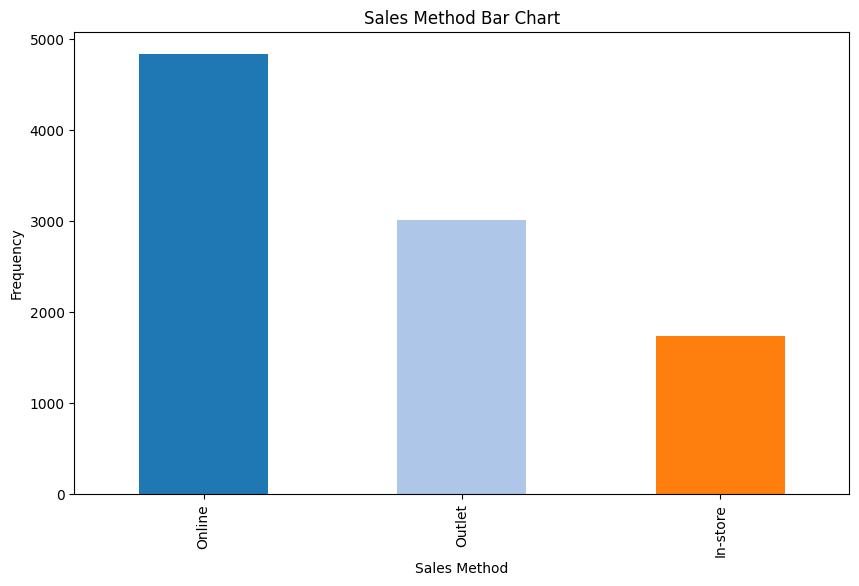

In [ ]:
# Set figure size of the cahrt
plt.figure(figsize = (10,6))

#define new variable with frequency counts
sales_method_frequency = df['Sales Method'].value_counts()

#plot chart
sales_method_frequency.plot(kind = 'bar', color = colors, xlabel = 'Sales Method', ylabel = 'Frequency', title = 'Sales Method Bar Chart')
plt.show()

As we can see from the chart above, customers tend to buy Adidas products online by a relatively large margin, followed by outlet, and then in-store. This means that focusing on online sales may be the most effective way of gaining a profit.

*Price per Unit Level*

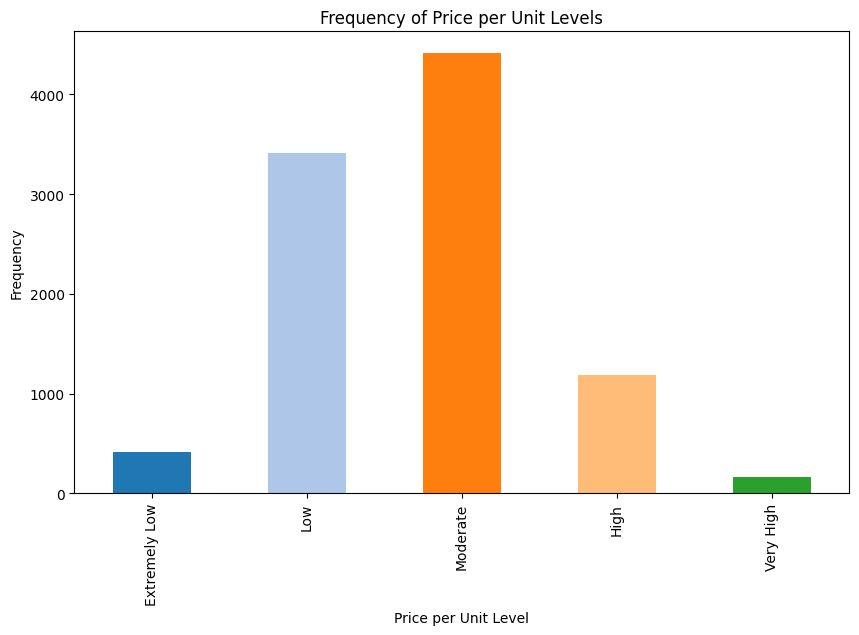

In [ ]:

# Define the order of your price levels
level_order = ['Extremely Low', 'Low', 'Moderate', 'High', 'Very High']

# Count the frequency of each price level
price_per_unit_level_frequency = df['Price per Unit Level'].value_counts()

# Reorder the series according to the defined level order
ordered_frequency = price_per_unit_level_frequency.reindex(level_order)

# Plot
plt.figure(figsize=(10, 6))
ordered_frequency.plot(kind='bar', ylabel='Frequency', xlabel='Price per Unit Level', title='Frequency of Price per Unit Levels', color=colors)
plt.show()

The chart indicates that customers predominantly purchase items in the low to moderate price range. The 'High' price level ranks third in frequency, followed by 'Extremely Low', which occurs relatively infrequently. The 'Very High' price level is the least common, suggesting these purchases are quite rare.

##**Run at least 3 charts that use aggregation (group by and aggregate) and interpret the outcome.**


---



1. **What is the average operating margin for each retailer?**

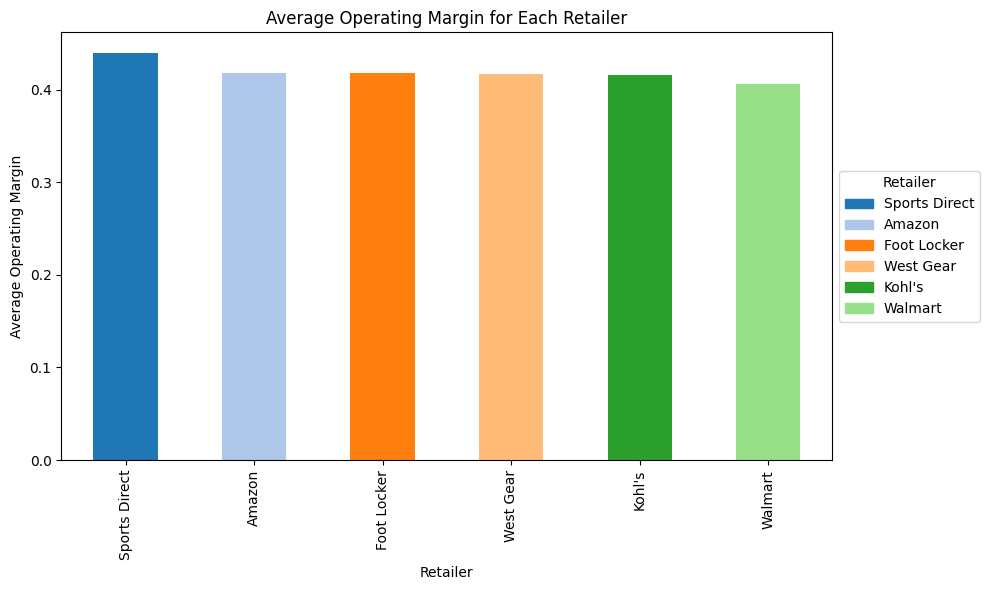

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# Assuming 'df' is your DataFrame and it has columns 'Retailer' and 'Operating Margin'
# colors is a list of color codes, one for each retailer

# Compute the mean 'Operating Margin' for each retailer
retailer_avg_operating_margin = df.groupby('Retailer')['Operating Margin'].mean()

# Sort the series in descending order
retailer_avg_operating_margin_sorted = retailer_avg_operating_margin.sort_values(ascending=False)

# Define the figure size
plt.figure(figsize=(10, 6))

# Create a list of patches for the legend
patches = [mpatches.Patch(color=color, label=retailer) for color, retailer in zip(colors, retailer_avg_operating_margin_sorted.index)]

# Plot the sorted data
retailer_avg_operating_margin_sorted.plot(kind='bar', color=colors, title='Average Operating Margin for Each Retailer')

# Label the x-axis and y-axis
plt.xlabel('Retailer')
plt.ylabel('Average Operating Margin')

# Adding the legend outside the plot
plt.legend(handles=patches, title='Retailer', loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()


The chart above illustrates that Sports Direct boasts the most impressive operating margin among the compared retailers, with Amazon, Foot Locker, West Gear, and Kohl's trailing closely. Conversely, Walmart has the lowest operating margin of the group. A higher operating margin suggests that a retailer incurs lower costs to operate its stores, which in turn implies that a larger portion of the sales revenue is retained as profit. For instance, Sport Direct, on average, retains 45% of total sales as profit, this efficiency in operation would result in a greater percentage of profits being passed on to Adidas from the sales of their products, compared to Walmart which is about 40%.

- This gives us some potential background information on our MLR model later, as the retailers with higher operation margins may have a higher coefficient and effect on the predictive outcome.

2. **What are the average operating margins for 'Price Per Unit Levels'?**

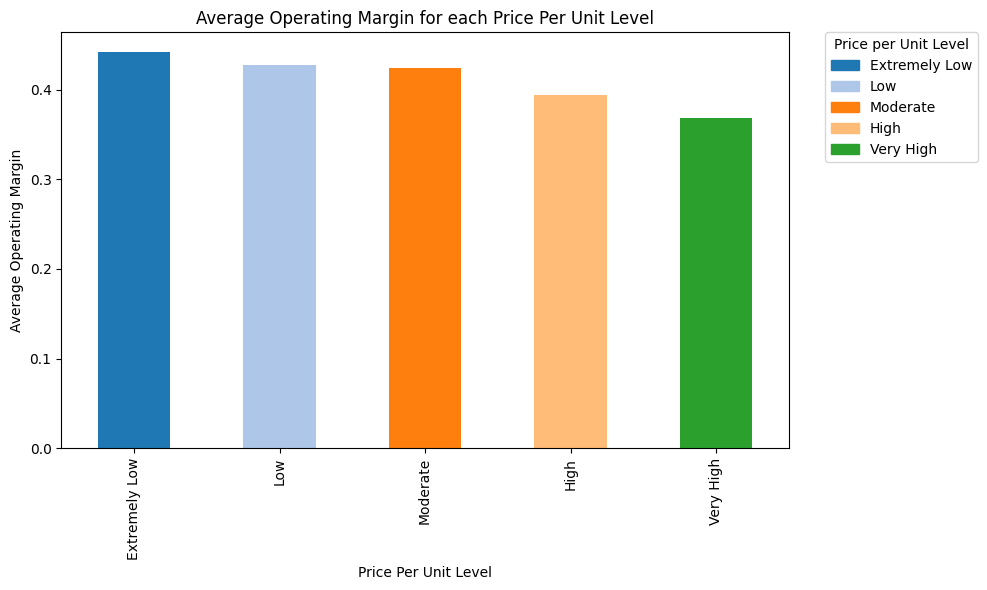

In [ ]:

# Define the figure size
plt.figure(figsize=(10, 6))

ppu_avg_operating_margin = df.groupby('Price per Unit Level')['Operating Margin'].mean()

# Sort the series in descending order
ppu_avg_operating_margin_sorted = ppu_avg_operating_margin.sort_values(ascending=False)

# Plot the sorted data
ppu_avg_operating_margin_sorted.plot(kind='bar', color=colors, title='Average Operating Margin for each Price Per Unit Level')


# Create a list of patches for the legend
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, ppu_avg_operating_margin_sorted.index)]

# Label the x-axis and y-axis
plt.xlabel('Price Per Unit Level')
plt.ylabel('Average Operating Margin')

# Adding the legend outside the plot
# Adjust the bbox_to_anchor values as needed to position the legend.
plt.legend(handles=patches, title='Price per Unit Level', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()


As we can see from the chart above, the stores whose customers buy the most expensive products tended to have a lower operating margin, while the stores whose customers buy the least expensive products tended to have a high operating margin. In simpler terms, stores earned a higher percentage of profit if their customers bought cheaper products.

- This is a very interesting finding, so in the next quesion we will try to figure out why this is the case?

3. **Is the reason why stores had a higher operating margin (for stores whose customers bought cheaper products, based on price per unit level) because they tended to sell their products online?**

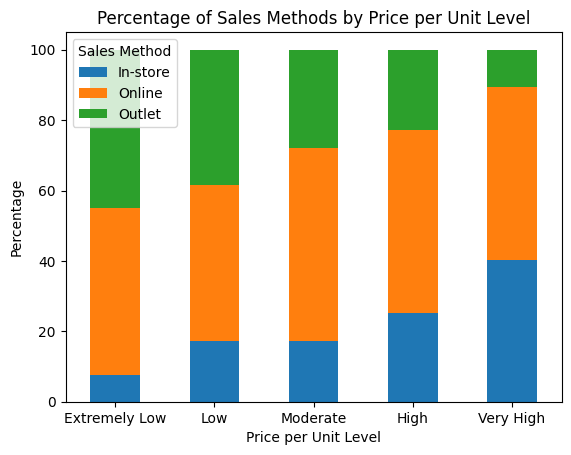

In [ ]:
# Group by 'Price per Unit Level' and 'Sales Method', then count
grouped = df.groupby(['Price per Unit Level', 'Sales Method']).size().reset_index(name='Count')

# Calculate total counts for each 'Price per Unit Level'
total_counts = grouped.groupby('Price per Unit Level')['Count'].transform('sum')

# Calculate percentage
grouped['Percentage'] = (grouped['Count'] / total_counts) * 100

# Pivot the data for visualization
pivot_df = grouped.pivot(index='Price per Unit Level', columns='Sales Method', values='Percentage')

# Plotting
pivot_df.plot(kind='bar', stacked=True)
plt.ylabel('Percentage')
plt.title('Percentage of Sales Methods by Price per Unit Level')
plt.xticks(rotation=0)
plt.show()

As you can see from the chart above, we can see that this chart backs up our previous findings.

- The chart suggests that in-store purchases (represented by blue) decrease as the price per unit level lowers, implying that customers are less likely to buy cheaper items in-store. This trend could contribute to higher operating margins for stores selling lower-priced goods, as in-store sales typically involve higher operational costs.

- There was no trend in 'Online' across all price levels, as the percentages were generally similar across the chart.

- If we look at the green (outlet), we can see that people feel more comfortable with buying cheaper products at outlets.



---


This imples that our model will give a higher weight for lower price per unit levels and less weight for 'in-store' sales method.


**4. What is the average operating margin for each Region?**

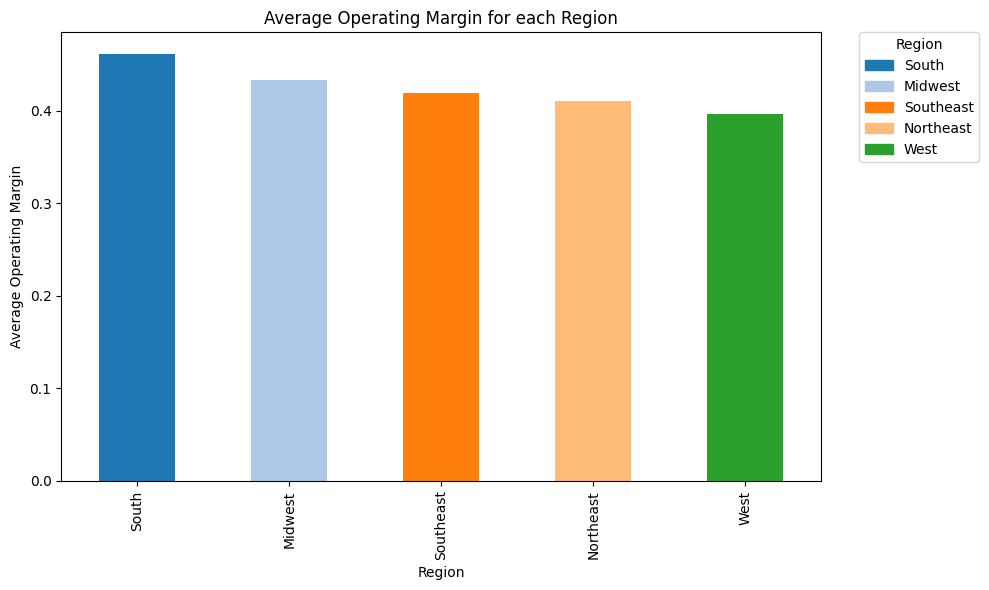

In [ ]:

# Define the figure size
plt.figure(figsize=(10, 6))

region_avg_operating_margin = df.groupby('Region')['Operating Margin'].mean()

# Sort the series in descending order
region_avg_operating_margin_sorted = region_avg_operating_margin.sort_values(ascending=False)

# Plot the sorted data
region_avg_operating_margin_sorted.plot(kind='bar', color=colors, title='Average Operating Margin for each Region')


# Create a list of patches for the legend
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, region_avg_operating_margin_sorted.index)]

# Label the x-axis and y-axis
plt.xlabel('Region')
plt.ylabel('Average Operating Margin')

# Adding the legend outside the plot
# Adjust the bbox_to_anchor values as needed to position the legend.
plt.legend(handles=patches, title='Region', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

5. What is the average operating profit for each type of product?

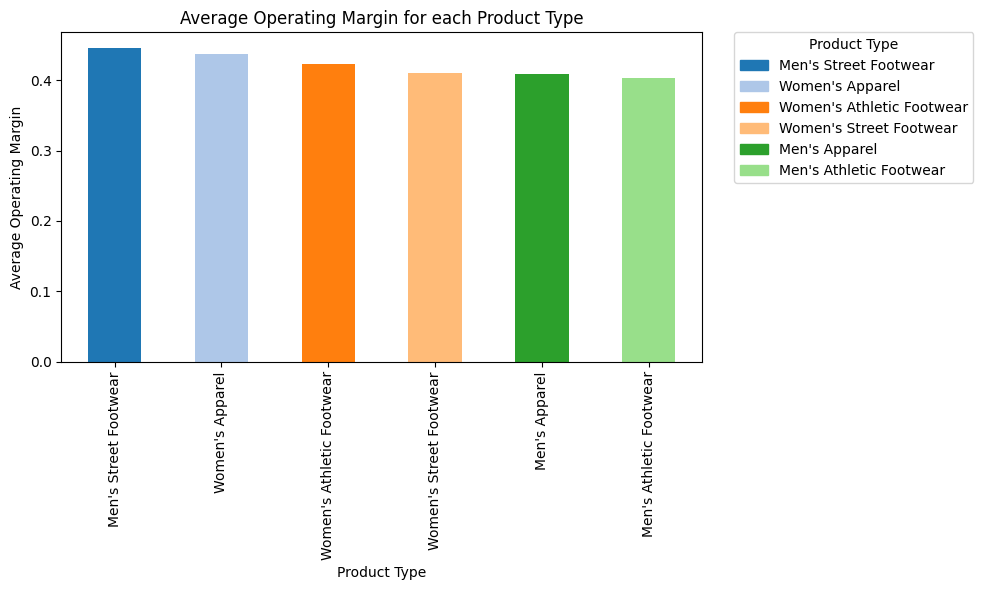

In [ ]:

# Define the figure size
plt.figure(figsize=(10, 6))

product_avg_operating_margin = df.groupby('Product Type')['Operating Margin'].mean()

# Sort the series in descending order
product_avg_operating_margin_sorted = product_avg_operating_margin.sort_values(ascending=False)

product_avg_operating_margin_sorted.plot(kind='bar', color=colors, title='Average Operating Margin for each Product Type')


# Create a list of patches for the legend
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, product_avg_operating_margin_sorted.index)]

# Label the x-axis and y-axis
plt.xlabel('Product Type')
plt.ylabel('Average Operating Margin')

# Adding the legend outside the plot
# Adjust the bbox_to_anchor values as needed to position the legend.
plt.legend(handles=patches, title='Product Type', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

## 10. Data preprocessing
In this step you conduct preprocessing. Different algorithms require different types of preprocessing so you may need to replicate this step multiple times for different models.

### 10.1. Dummies
***Why use dummy variables?*** To accommodate the numerous categorical variables in our dataset, we must generate dummy variables. Since machine learning models exclusively process numerical data, we will transform each category within these columns into new columns, encoding them as 0 (indicating the absence of that category) and 1 (signifying its presence). Additionally, to avoid multicollinearity and allow the model to make effective inferences, we will drop one dummy column for each set of dummies created from the original categorical columns. This step is crucial for maintaining the statistical integrity of our model and ensuring accurate predictions.<br>
***Do we need to use dummies?***
Yes! This is because we have many different categorical variables that we need to turn into dummies.

Let's start by taking a look at the datatypes of each column. We will be able to see which columns are categorical (denoted as 'objects'), and will turn these into dummy variables.

In [ ]:
df.dtypes

Retailer                  object
Region                    object
Product Type              object
Operating Margin         float64
Sales Method              object
Price per Unit Level    category
dtype: object

As we can see, the 'Retailer', 'Region', 'Product Type', 'Sales Method,  and 'Price per Unit Level'.are our categorical variables that we will turn into dummies. Moreover, as we analyzed earlier, these columns are made up of diffferent categories, in the form of strings.


---



Now, I will turn these columns into dummies. We will use n-1 dummies to avoid multicollinearity by using the *drop_first* parameter, which will drop the one dummy column for each set of dummies from the original categorical columns. I will save it into the X variable, which will be the variable that holds out predictors.

In [ ]:
# Create dummy variables
dummies = pd.get_dummies(df[['Retailer', 'Region', 'Product Type', 'Sales Method', 'Price per Unit Level']], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
# Make sure to align them on the index
df_dummies = pd.concat([df, dummies], axis=1)

#drop the original columns
df_dummies.drop(df[['Retailer', 'Region', 'Product Type', 'Sales Method', 'Price per Unit Level']], axis=1, inplace=True)

In [ ]:
new_df = df_dummies

In [ ]:
new_df.head()

,Operating Margin,Retailer_Foot Locker,Retailer_Kohl's,Retailer_Sports Direct,Retailer_Walmart,Retailer_West Gear,Region_Northeast,Region_South,Region_Southeast,Region_West,...,Product Type_Men's Street Footwear,Product Type_Women's Apparel,Product Type_Women's Athletic Footwear,Product Type_Women's Street Footwear,Sales Method_Online,Sales Method_Outlet,Price per Unit Level_Low,Price per Unit Level_Moderate,Price per Unit Level_High,Price per Unit Level_Very High
0,0.50,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0.30,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.35,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.35,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.30,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.shape

(9585, 6)

As we can see above, originally, there were 25 different categories in total, out of the 5 different columns. This means that there should be 25-5 = 20 dummy columns. This is confirmed above, as we can see that there are 21 columns (including the y variable).


---



### 10.2. Normalization

Explain why or why not you need to normalize the data. Normalize it below if needed.

There is no need to normalize the data because all of my predictors are categorical variables (dummies). The only numerical variable is the dependent variable (Operating Profit), so there is no need to normalize the data because we dont need to put different numerical variables on the same scale with one another.

## 10.3 Modeling

### **Train a Linear Regression (Ordinary Least Squares, OLS) model**
- Run OLS model selection (exhaustive search, forward selection,
stepwise, backward selection). Select the best model (40 points).
- Report MAE, Average error, MAPE, and RMSE for the best model for
both training and validation sets (15 points).
- Draw histogram of residuals for the best model using validation set and
interpret it (10 points)

Assign predictors to "X" variable and dependent variable to the "Y" variable

In [ ]:
X = new_df.drop(columns = 'Operating Margin')
y = new_df['Operating Margin']

Partition the Data

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,
random_state=42)

Initiate the Model

In [ ]:
# Linear Regression Model is created and saved to 'model'
model = LinearRegression()

**Exhaustive Search ( This is the code that I would use for an exhaustive search however, my notebook does not have enough computing power to calculate this.)**


---





```
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

```










Forward Search

In [ ]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)
print('The AIC score is 12869.05.')

Variables: Retailer_Foot Locker, Retailer_Kohl's, Retailer_Sports Direct, Retailer_Walmart, Retailer_West Gear, Region_Northeast, Region_South, Region_Southeast, Region_West, Product Type_Men's Athletic Footwear, Product Type_Men's Street Footwear, Product Type_Women's Apparel, Product Type_Women's Athletic Footwear, Product Type_Women's Street Footwear, Sales Method_Online, Sales Method_Outlet, Price per Unit Level_Low, Price per Unit Level_Moderate, Price per Unit Level_High, Price per Unit Level_Very High
Start: score=-10905.30, constant
Step: score=-12082.38, add Sales Method_Online
Step: score=-12370.93, add Region_South
Step: score=-12461.45, add Product Type_Men's Street Footwear
Step: score=-12531.40, add Product Type_Women's Apparel
Step: score=-12624.51, add Price per Unit Level_High
Step: score=-12672.06, add Sales Method_Outlet
Step: score=-12721.57, add Retailer_Walmart
Step: score=-12777.47, add Region_West
Step: score=-12806.24, add Product Type_Women's Athletic Footwear

Backward Elimination

In [ ]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)
print('The AIC score is 12869.05.')

Variables: Retailer_Foot Locker, Retailer_Kohl's, Retailer_Sports Direct, Retailer_Walmart, Retailer_West Gear, Region_Northeast, Region_South, Region_Southeast, Region_West, Product Type_Men's Athletic Footwear, Product Type_Men's Street Footwear, Product Type_Women's Apparel, Product Type_Women's Athletic Footwear, Product Type_Women's Street Footwear, Sales Method_Online, Sales Method_Outlet, Price per Unit Level_Low, Price per Unit Level_Moderate, Price per Unit Level_High, Price per Unit Level_Very High
Start: score=-12860.28
Step: score=-12862.27, remove Product Type_Women's Street Footwear
Step: score=-12864.22, remove Region_Northeast
Step: score=-12866.08, remove Retailer_Kohl's
Step: score=-12867.90, remove Price per Unit Level_Moderate
Step: score=-12868.76, remove Price per Unit Level_Low
Step: score=-12869.05, remove Retailer_Foot Locker
Step: score=-12869.05, remove None
['Retailer_Sports Direct', 'Retailer_Walmart', 'Retailer_West Gear', 'Region_South', 'Region_Southeast

Stepwise

In [ ]:
import statsmodels.api as sm
import pandas as pd

def stepwise_selection(X, y, threshold_in=0.01, threshold_out=0.05):
    # I start with an empty list of included variables.
    included = []
    while True:
        changed = False

        # For the forward step, I consider adding each variable not in the model.
        excluded = list(set(X.columns) - set(included))
        new_aic = pd.Series(index=excluded, dtype = 'float64')
        for new_column in excluded:
            # For each candidate variable, I fit the model and calculate the AIC.
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_aic[new_column] = model.aic

        # I choose the variable with the lowest AIC to add to the model.
        best_aic = new_aic.min()
        if best_aic < (sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit().aic - threshold_in):
            best_feature = new_aic.idxmin()
            included.append(best_feature)
            changed = True

        # For the backward step, I check if removing any variable improves the model.
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        aics = pd.Series(model.aic, index=included)
        worst_aic = aics.max()
        if worst_aic > (model.aic + threshold_out):
            # If removing a variable lowers the AIC, I remove it from the model.
            changed = True
            worst_feature = aics.idxmax()
            included.remove(worst_feature)

        # If there's no change in the model, the selection process stops.
        if not changed:
            break

    # The function returns the final list of variables that are included in the model.
    return included

# Now, I apply this function to my training data.
selected_features = stepwise_selection(train_X, train_y)
print('Selected features:', selected_features)
print('The AIC score is 12869.05.')


Selected features: ['Sales Method_Online', 'Region_South', "Product Type_Men's Street Footwear", "Product Type_Women's Apparel", 'Price per Unit Level_High', 'Sales Method_Outlet', 'Retailer_Walmart', 'Region_West', "Product Type_Women's Athletic Footwear", 'Price per Unit Level_Very High', 'Retailer_West Gear', 'Retailer_Sports Direct', 'Region_Southeast', "Product Type_Men's Athletic Footwear"]
The AIC score is 12869.05.


*Backward Elimination, Forward Search, Stepwise (and assuming exhaustive search) returns the same best variables (they are just shown in a different order). oreover, they all have the same AIC of 12869.05. Now, I will fit these variables to a new model.*

In [ ]:
# Create a new variable
train_X = train_X[['Retailer_Sports Direct', 'Retailer_Walmart', 'Retailer_West Gear', 'Region_South', 'Region_Southeast', 'Region_West', "Product Type_Men's Athletic Footwear", "Product Type_Men's Street Footwear", "Product Type_Women's Apparel", "Product Type_Women's Athletic Footwear", 'Sales Method_Online', 'Sales Method_Outlet', 'Price per Unit Level_High', 'Price per Unit Level_Very High']]
valid_X = valid_X[['Retailer_Sports Direct', 'Retailer_Walmart', 'Retailer_West Gear', 'Region_South', 'Region_Southeast', 'Region_West', "Product Type_Men's Athletic Footwear", "Product Type_Men's Street Footwear", "Product Type_Women's Apparel", "Product Type_Women's Athletic Footwear", 'Sales Method_Online', 'Sales Method_Outlet', 'Price per Unit Level_High', 'Price per Unit Level_Very High']]

In [ ]:
#Initiate a new model
new_model = LinearRegression()

In [ ]:
new_model.fit(train_X,train_y)

LinearRegression()

In [ ]:
print('intercept ',new_model.intercept_)
print(pd.DataFrame({'Predictor': train_X.columns, 'coefficient': new_model.coef_}))

intercept  0.34944263564317657
                                 Predictor  coefficient
0                   Retailer_Sports Direct     0.012106
1                         Retailer_Walmart    -0.022056
2                       Retailer_West Gear     0.016037
3                             Region_South     0.031972
4                         Region_Southeast    -0.011518
5                              Region_West    -0.025023
6     Product Type_Men's Athletic Footwear    -0.006241
7       Product Type_Men's Street Footwear     0.035057
8             Product Type_Women's Apparel     0.032782
9   Product Type_Women's Athletic Footwear     0.013962
10                     Sales Method_Online     0.100790
11                     Sales Method_Outlet     0.029995
12               Price per Unit Level_High    -0.025720
13          Price per Unit Level_Very High    -0.039108


Visualize Coefficients

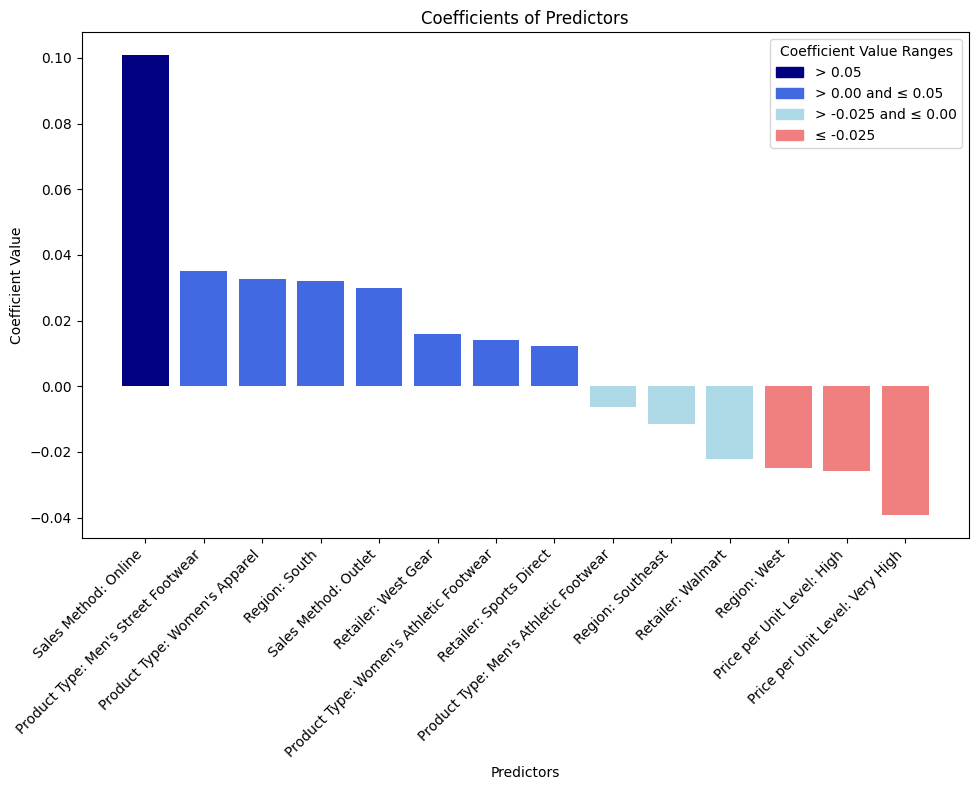

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Prepare the data
data = {
    'Predictor': ['Retailer: Sports Direct', 'Retailer: Walmart', 'Retailer: West Gear', 'Region: South',
                  'Region: Southeast', 'Region: West', "Product Type: Men's Athletic Footwear",
                  "Product Type: Men's Street Footwear", "Product Type: Women's Apparel",
                  "Product Type: Women's Athletic Footwear", 'Sales Method: Online', 'Sales Method: Outlet',
                  'Price per Unit Level: High', 'Price per Unit Level: Very High'],
    'Coefficient': [0.012106, -0.022056, 0.016037, 0.031972, -0.011518, -0.025023, -0.006241,
                    0.035057, 0.032782, 0.013962, 0.100790, 0.029995, -0.025720, -0.039108]
}

cf = pd.DataFrame(data)

# Sorting the DataFrame by coefficients in descending order
cf_sorted = cf.sort_values(by='Coefficient', ascending=False)

# Generating colors based on coefficient values
# Darker blue for higher values, light blue for lower positive values, and light coral for negative values
colors = ['navy' if x > 0.05 else 'royalblue' if x > 0 else 'lightblue' if x > -0.025 else 'lightcoral' for x in cf_sorted['Coefficient']]

# Creating the plot
plt.figure(figsize=(10, 8))

# Using a bar plot to visualize the coefficients
plt.bar(cf_sorted['Predictor'], cf_sorted['Coefficient'], color=colors)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Creating a legend for the color coding
high_patch = mpatches.Patch(color='navy', label='> 0.05')
medium_patch = mpatches.Patch(color='royalblue', label='> 0.00 and ≤ 0.05')
low_patch = mpatches.Patch(color='lightblue', label='> -0.025 and ≤ 0.00')
negative_patch = mpatches.Patch(color='lightcoral', label='≤ -0.025')
plt.legend(handles=[high_patch, medium_patch, low_patch, negative_patch], title="Coefficient Value Ranges")

# Adding titles and labels for context
plt.title('Coefficients of Predictors')
plt.xlabel('Predictors')
plt.ylabel('Coefficient Value')

# Adjusting layout for a better fit
plt.tight_layout()

# Displaying the plot
plt.show()


In [ ]:
# print performance measures
regressionSummary(train_y, new_model.predict(train_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.0788
            Mean Absolute Error (MAE) : 0.0615
          Mean Percentage Error (MPE) : -3.9843
Mean Absolute Percentage Error (MAPE) : 15.8909


- Mean Error (ME) (-0.0000): Very good, indicating no systematic bias in predictions.
- Root Mean Squared Error (RMSE) (0.0788): Relatively low. Lower values are better, indicating good model accuracy.
- Mean Absolute Error (MAE) (0.0615): Also low, suggesting good predictive accuracy of the model.
- Mean Percentage Error (MPE) (-3.9820): Indicates a tendency to slightly underestimate.
- Mean Absolute Percentage Error (MAPE) (15.8832): Reflects the average error in percentage terms and this value is relatively low.

In [ ]:
regressionSummary(valid_y, new_model.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0001
       Root Mean Squared Error (RMSE) : 0.0794
            Mean Absolute Error (MAE) : 0.0618
          Mean Percentage Error (MPE) : -4.0908
Mean Absolute Percentage Error (MAPE) : 16.0132


**Comparison Between Training and Validation:**

- Mean Error (ME): Close to zero in both cases, indicating no significant systematic bias in either training or validation predictions.
- Root Mean Squared Error (RMSE): Slightly higher in the validation set (0.0794 vs. 0.0788), but the difference is minimal, suggesting consistent prediction errors across both datasets.
- Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE): Slightly higher on the validation set, which is normal since the model was trained to minimize errors on the training data.
- Mean Percentage Error (MPE): The negative values in both cases suggest a slight tendency of the model to underestimate in both training and validation, with a marginally higher underestimation in the validation set.

**Overall:**
The similarity of these statistics indicates a well-generalized model with consistent performance across both training and validation datasets. There is lack a of overfitting and underfitting, which means our model is strong and consistent

In [ ]:
# Create a dataframe showing model predictions vs. the actual values.
result = pd.DataFrame({'Predicted': new_model.predict(valid_X), 'Actual': valid_y,
                       'Residual': valid_y - new_model.predict(valid_X)})
#Print the first 20 predictions
print(result.head(20))

      Predicted  Actual  Residual
5198   0.432271    0.50  0.067729
4233   0.443991    0.47  0.026009
39     0.393400    0.35 -0.043400
7226   0.483015    0.45 -0.033015
1844   0.373238    0.50  0.126762
5326   0.448510    0.49  0.041490
5444   0.457992    0.40 -0.057992
7416   0.476301    0.44 -0.036301
1350   0.320600    0.25 -0.070600
1060   0.379437    0.35 -0.029437
1436   0.386744    0.50  0.113256
7413   0.497395    0.50  0.002605
2851   0.450233    0.35 -0.100233
487    0.386499    0.25 -0.136499
8245   0.377512    0.27 -0.107512
7807   0.373196    0.34 -0.033196
6280   0.444579    0.46  0.015421
2474   0.457294    0.50  0.042706
3995   0.474112    0.60  0.125888
6832   0.456097    0.44 -0.016097


1.0


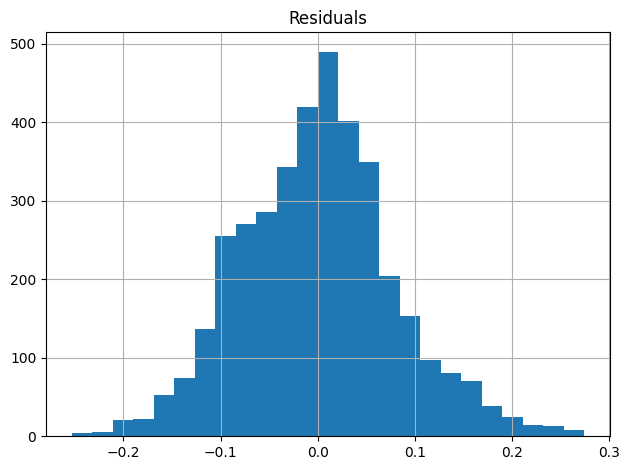

This histogram is a great indicator that our model is reliable and makes accurate predictions.
As we can see from this bell-curve, most of the models predictions are off from between -0.1 to 0.1, which is an extremely low different.
The higher the residuals, the less occurences there are.


In [ ]:
all_residuals = valid_y - new_model.predict(valid_X)

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()
print('This histogram is a great indicator that our model is reliable and makes accurate predictions.')
print('As we can see from this bell-curve, most of the models predictions are off from between -0.1 to 0.1, which is an extremely low different.')
print('The higher the residuals, the less occurences there are.')

###**Train at least one more predictive model (e.g., KNN, Regression Trees, Neural Net)**
-  Train the model. Note that this section may require different
preprocessing compared to OLS. Discuss if any changes to processing
are required. (40 points).
-  Report MAE, Average error, MAPE, and RMSE for the best model for
both training and validation sets (15 points).
-  Draw histogram of residuals for the best model using validation set and
interpret it (10 points).

*I am going to do a KNN regressor prediction model. In KNN for regression, the output is a continuous value. The value is calculated as the average of the values of its k nearest neighbors.*

**Preprocessing**

In [ ]:
# Partition Data
train_data, test_data = train_test_split(new_df,test_size = 0.4, random_state = 26)
print(train_data.shape, test_data.shape)

(5751, 21) (3834, 21)


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

# Create train_features variable, which contains all of the predictors. This is for training data.
train_features = train_data.drop(columns = 'Operating Margin')

#Create train_label variable, which contains 'Operating Margin', which will be out classification. This is for training data.
train_label = train_data['Operating Margin']

# Initialize model
scaler = preprocessing.StandardScaler()

# Fit the training data
scaler.fit(train_features)

# Normalize the training data features
train_norm_features = pd.DataFrame(scaler.transform(train_features), columns=train_features.columns)

# Create a new data frame consisting of normalized data and concat classifier "Operating Margin" into new df.
trainNorm = pd.concat([train_norm_features, train_label.reset_index(drop=True)], axis=1)

#View normalized dataframe of training set
trainNorm.head()

,Retailer_Foot Locker,Retailer_Kohl's,Retailer_Sports Direct,Retailer_Walmart,Retailer_West Gear,Region_Northeast,Region_South,Region_Southeast,Region_West,Product Type_Men's Athletic Footwear,...,Product Type_Women's Apparel,Product Type_Women's Athletic Footwear,Product Type_Women's Street Footwear,Sales Method_Online,Sales Method_Outlet,Price per Unit Level_Low,Price per Unit Level_Moderate,Price per Unit Level_High,Price per Unit Level_Very High,Operating Margin
0,1.614200,-0.341295,-0.514037,-0.259179,-0.570724,1.758760,-0.466815,-0.381599,-0.584378,-0.451546,...,-0.444271,-0.444551,2.190292,-1.006105,1.482152,1.325002,-0.916690,-0.375293,-0.133702,0.42
1,-0.619502,-0.341295,-0.514037,3.858334,-0.570724,-0.568582,2.142177,-0.381599,-0.584378,-0.451546,...,-0.444271,-0.444551,2.190292,0.993933,-0.674694,1.325002,-0.916690,-0.375293,-0.133702,0.46
2,-0.619502,-0.341295,-0.514037,-0.259179,1.752160,-0.568582,-0.466815,-0.381599,1.711221,-0.451546,...,-0.444271,-0.444551,2.190292,0.993933,-0.674694,-0.754716,1.090882,-0.375293,-0.133702,0.55
3,-0.619502,2.930017,-0.514037,-0.259179,-0.570724,-0.568582,-0.466815,-0.381599,-0.584378,-0.451546,...,2.250879,-0.444551,-0.456560,-1.006105,1.482152,-0.754716,1.090882,-0.375293,-0.133702,0.25
4,-0.619502,-0.341295,1.945386,-0.259179,-0.570724,-0.568582,-0.466815,2.620554,-0.584378,-0.451546,...,-0.444271,-0.444551,2.190292,-1.006105,1.482152,-0.754716,1.090882,-0.375293,-0.133702,0.42


In [ ]:
# Create a variable "test_features", which will hold our predictors from our test data
test_features = test_data.drop(columns = 'Operating Margin')

# Create a variable "test_label", which holds out classifier "Personal Loan"
test_label = test_data['Operating Margin']

#Normalize predictors "test_features"
test_norm_features = pd.DataFrame(scaler.transform(test_features), columns = test_features.columns)

# Concat classifier "Personal Loan"
validNorm = pd.concat([test_norm_features, test_label.reset_index(drop=True)], axis = 1)

# View new data frame
validNorm.head()

,Retailer_Foot Locker,Retailer_Kohl's,Retailer_Sports Direct,Retailer_Walmart,Retailer_West Gear,Region_Northeast,Region_South,Region_Southeast,Region_West,Product Type_Men's Athletic Footwear,...,Product Type_Women's Apparel,Product Type_Women's Athletic Footwear,Product Type_Women's Street Footwear,Sales Method_Online,Sales Method_Outlet,Price per Unit Level_Low,Price per Unit Level_Moderate,Price per Unit Level_High,Price per Unit Level_Very High,Operating Margin
0,-0.619502,2.930017,-0.514037,-0.259179,-0.570724,-0.568582,-0.466815,-0.381599,1.711221,-0.451546,...,-0.444271,-0.444551,-0.45656,-1.006105,1.482152,1.325002,-0.916690,-0.375293,-0.133702,0.47
1,1.614200,-0.341295,-0.514037,-0.259179,-0.570724,-0.568582,-0.466815,-0.381599,-0.584378,-0.451546,...,-0.444271,-0.444551,-0.45656,-1.006105,1.482152,1.325002,-0.916690,-0.375293,-0.133702,0.35
2,-0.619502,2.930017,-0.514037,-0.259179,-0.570724,-0.568582,-0.466815,-0.381599,1.711221,-0.451546,...,-0.444271,-0.444551,-0.45656,-1.006105,-0.674694,-0.754716,1.090882,-0.375293,-0.133702,0.50
3,-0.619502,-0.341295,1.945386,-0.259179,-0.570724,1.758760,-0.466815,-0.381599,-0.584378,-0.451546,...,-0.444271,-0.444551,-0.45656,-1.006105,-0.674694,1.325002,-0.916690,-0.375293,-0.133702,0.30
4,1.614200,-0.341295,-0.514037,-0.259179,-0.570724,-0.568582,-0.466815,-0.381599,-0.584378,2.214615,...,-0.444271,-0.444551,-0.45656,-1.006105,1.482152,-0.754716,1.090882,-0.375293,-0.133702,0.30


In [ ]:
#Create 4 variables train_X, train_y, valid_X, valid_y representing training features, training label, validation features, and validation label respectively.
train_X = trainNorm.drop(columns = 'Operating Margin')
train_y = trainNorm['Operating Margin']
valid_X = validNorm.drop(columns = 'Operating Margin')
valid_y = validNorm['Operating Margin']

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Assuming train_X and train_y are your training features and labels
knn = KNeighborsRegressor(n_neighbors=5)  # Change n_neighbors as needed
knn.fit(train_X, train_y)

KNeighborsRegressor()

In [ ]:
# Predictions on the training set
train_predictions = knn.predict(train_X)

# Predictions on the validation set
valid_predictions = knn.predict(valid_X)



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Performance metrics calculations
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mpe = np.mean((y_true - y_pred) / y_true) * 100  # MPE calculation
    return mae, rmse, mape, mpe

# Metrics for the training set
train_mae, train_rmse, train_mape, train_mpe = calculate_metrics(train_y, train_predictions)

# Metrics for the validation set
valid_mae, valid_rmse, valid_mape, valid_mpe = calculate_metrics(valid_y, valid_predictions)

print(f"Training - MAE: {train_mae}, RMSE: {train_rmse}, MAPE: {train_mape}, MPE: {train_mpe}")
print(f"Validation - MAE: {valid_mae}, RMSE: {valid_rmse}, MAPE: {valid_mape}, MPE: {valid_mpe}")



Training - MAE: 0.046423230742479574, RMSE: 0.061239092052458574, MAPE: 11.691487282506504, MPE: -2.67149120414732
Validation - MAE: 0.05543401147626501, RMSE: 0.07226106816143106, MAPE: 14.181047474669148, MPE: -3.646315976195387


###**Compare performance of OLS and the second model using a bar chart that includes all 4 of the above performance measures.**
-  Select your best final model (20 points).

###**KNN Regressor**
Training:

      RMSE: 0.061239092052458574
      MAE: 0.046423230742479574
      MPE: -2.67149120414732
      MAPE: 11.691487282506504


Validation:


     RMSE: 0.07226106816143106
     MAE: 0.05543401147626501
     MPE: -3.646315976195387
     MAPE: 14.181047474669148


###**OLS**

Training Data

       Root Mean Squared Error (RMSE) : 0.0788
       Mean Absolute Error (MAE) : 0.0615
       Mean Percentage Error (MPE) : -3.9843
       Mean Absolute Percentage Error (MAPE) : 15.8909



Validation Data

          Root Mean Squared Error (RMSE) : 0.0794
          Mean Absolute Error (MAE) : 0.0618
          Mean Percentage Error (MPE) : -4.0908
          Mean Absolute Percentage Error (MAPE) : 16.013
        


Bar Chart Comparison (Normalized)

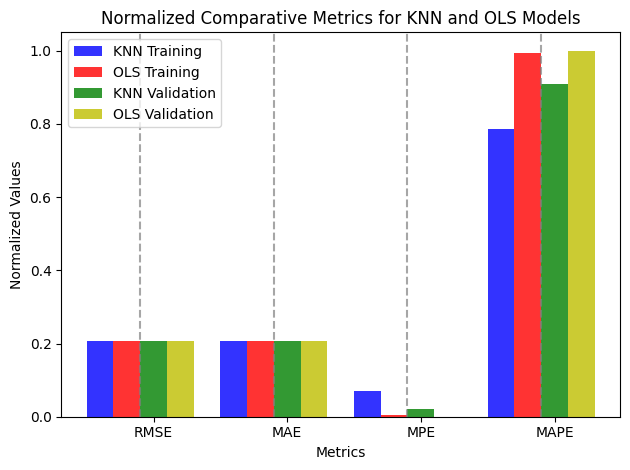

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Data for KNN and OLS models
metrics = ["RMSE", "MAE", "MPE", "MAPE"]
knn_training = [0.061239092052458574, 0.046423230742479574, -2.67149120414732, 11.691487282506504]
ols_training = [0.0788, 0.0615, -3.9843, 15.8909]
knn_validation = [0.07226106816143106, 0.05543401147626501, -3.646315976195387, 14.181047474669148]
ols_validation = [0.0794, 0.0618, -4.0908, 16.013]

# Combining all data for normalization
all_data = np.array(knn_training + ols_training + knn_validation + ols_validation).reshape(-1, 1)

# Normalizing the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(all_data)

# Splitting the normalized data back to respective categories
knn_training_norm, ols_training_norm, knn_validation_norm, ols_validation_norm = np.split(normalized_data, 4)

# Number of metric groups and index for the groups
n_groups = len(metrics)
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

# Create the figure
fig, ax = plt.subplots()

# Bar plots for each metric with normalized data
rects1 = ax.bar(index - bar_width, knn_training_norm.flatten(), bar_width,
                alpha=opacity, color='b', label='KNN Training')

rects2 = ax.bar(index, ols_training_norm.flatten(), bar_width,
                alpha=opacity, color='r', label='OLS Training')

# Adding a dashed line to separate training and validation data for each metric
for i in index:
    ax.axvline(x=i + bar_width / 2, linestyle='--', color='grey', alpha=0.7)

rects3 = ax.bar(index + bar_width, knn_validation_norm.flatten(), bar_width,
                alpha=opacity, color='g', label='KNN Validation')

rects4 = ax.bar(index + 2 * bar_width, ols_validation_norm.flatten(), bar_width,
                alpha=opacity, color='y', label='OLS Validation')

# Labels, title, and axes ticks
ax.set_xlabel('Metrics')
ax.set_ylabel('Normalized Values')
ax.set_title('Normalized Comparative Metrics for KNN and OLS Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics)
ax.legend()

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show()


As we can see from above, the RMSE and MAE for KNN and OLS are extremely similar with one another, for both training and validation data. However, for MPE and MAPE,

- If accurate prediction of the direction of errors is important (e.g., knowing whether the model tends to overestimate or underestimate), the model with the smaller MPE, which is the **OLS Model**, might be preferred.
- If minimizing the magnitude of errors is more critical (e.g., when the cost of an error is significant regardless of the direction), the model with the smaller MAPE, which is the **KNN Model** may be more desirable.

My final decision is that the KNN model is the best performing model, based on the criteria that the forecast is more accurate and the errors are smaller in percentage terms (based on MAPE).